In [3]:
import pandas as pd
import numpy as np
from cluster_vis import cluster_visualizer

In [21]:
two_d = ['lon', 'price']
x_label = 'Latitude'
y_label = 'Price'

In [37]:
three_d = ['lat', 'lon', 'price_per_bed']
x_label = 'Latitude'
y_label = 'Longitude'
z_label = 'Price/Bedroom'

In [38]:
vis = cluster_visualizer(X2_features=two_d, X3_features=three_d, x_label=x_label, y_label=y_label, z_label=z_label)

/Users/austinmadert/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


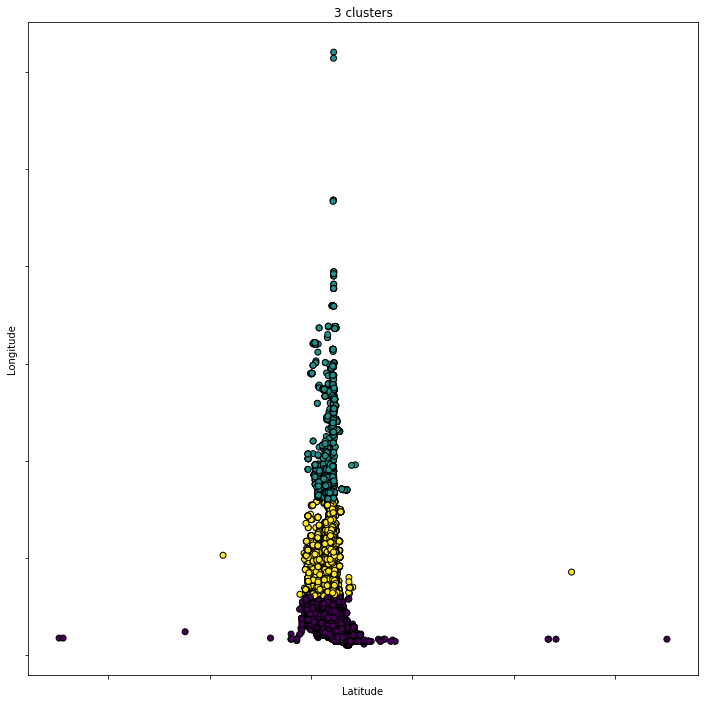

In [27]:
vis.two_dimension_plot();

In [39]:
vis.three_dimension_plot();

KeyError: "['price_per_bed'] not in index"